
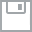
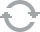
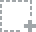
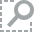
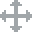
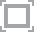
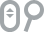
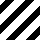
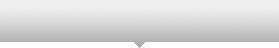
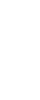
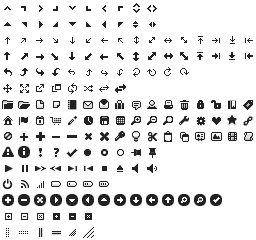
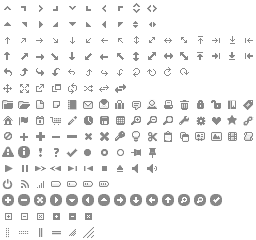
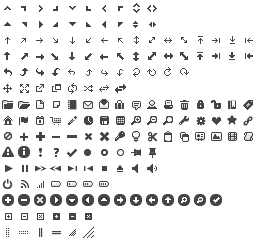
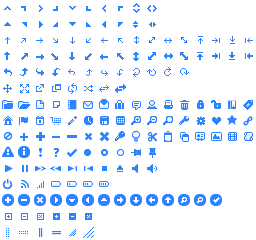
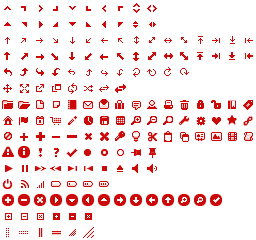
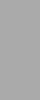
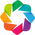
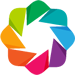

In [3]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze
from datascienceutils import predictiveModels as pm
from datascienceutils import sklearnUtils as sku

from IPython.display import Image
# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random

from sklearn import cross_validation
from sklearn import metrics

from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook()

# Set pandas display options
#pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)


In [5]:
# Data set from https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/
columns = ['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 
           'big_liver', 'firm_liver', 'palpable_spleen', 'spiders', 'ascites', 'varices', 'bilirubin',
          'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology']

hepatitis_df = pd.read_csv('~/DataScientist/data/Hepatitis/hepatitis.data', names=columns, na_values=['?'])
    


FileNotFoundError: File b'/home/anand/DataScientist/data/Hepatitis/hepatitis.data' does not exist

In [2]:
from pprint import pprint
with open('./data/Hepatitis/hepatitis.names', 'r') as fd:
    pprint(fd.readlines())

['1. Title: Hepatitis Domain\n',
 '\n',
 '2. Sources:\n',
 '     (a) unknown\n',
 '     (b) Donor: G.Gong  (Carnegie-Mellon University) via \n',
 '                   Bojan Cestnik\n',
 '                   Jozef Stefan Institute\n',
 '                   Jamova 39\n',
 '                   61000 Ljubljana\n',
 '                   Yugoslavia (tel.: (38)(+61) 214-399 ext.287) }\n',
 '     (c) Date: November, 1988\n',
 '\n',
 '3. Past Usage:\n',
 '    1. Diaconis,P. & Efron,B. (1983).  Computer-Intensive Methods in \n',
 '       Statistics.  Scientific American, Volume 248.\n',
 '       -- Gail Gong reported a 80% classfication accuracy\n',
 '    2. Cestnik,G., Konenenko,I, & Bratko,I. (1987). Assistant-86: A\n',
 '       Knowledge-Elicitation Tool for Sophisticated Users.  In I.Bratko\n',
 '       & N.Lavrac (Eds.) Progress in Machine Learning, 31-45, Sigma Press.\n',
 '       -- Assistant-86: 83% accuracy\n',
 '\n',
 '4. Relevant Information:\n',
 '    Please ask Gail Gong for further info

In [10]:
hepatitis_df.head()


,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,big_liver,firm_liver,palpable_spleen,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [11]:
analyze.correlation_analyze(hepatitis_df)

# Correlation btw Numerical Columns


# Pandas correlation coefficients matrix
                    class       age       sex   steroid  antivirals   fatigue   malaise  anorexia  big_liver  firm_liver  palpable_spleen   spiders   ascites   varices  bilirubin  alk_phosphate      sgot   albumin   protime  histology
class            1.000000 -0.219647  0.173051  0.134700   -0.130196  0.309269  0.337859  0.132172  -0.077630    0.063155         0.238734  0.398308  0.477882  0.368846  -0.463752      -0.161204 -0.077678  0.503272  0.409160  -0.337856
age             -0.219647  1.000000  0.008126 -0.085732   -0.013100 -0.282223 -0.115236  0.090394  -0.105480   -0.109382        -0.074853 -0.179997 -0.066220 -0.048893   0.125463       0.008924  0.082545 -0.262981 -0.222233   0.170780
sex              0.173051  0.008126  1.000000 -0.046989   -0.089249 -0.071822 -0.028820  0.017030  -0.072336   -0.059761        -0.055556 -0.042220  0.130744  0.054707  -0.056349       0.074243 -0.017652  0.005828 -0.011141  -0.137450
steroid          0.

In [12]:
analyze.dist_analyze(hepatitis_df)

Variance of class
0.164893171345
Skewness of class
-1.46469981305
Variance of age
157.901298701
Skewness of age
0.365293967444
Variance of sex
0.0931713447842
Skewness of sex
2.63373756827
Variance of steroid
0.251591545709
Skewness of steroid
-0.0262324217502
Variance of antivirals
0.131713447842
Skewness of antivirals
-1.92698035728
Variance of fatigue
0.229182582124
Skewness of fatigue
0.632154799613
Variance of malaise
0.240769034887
Skewness of malaise
-0.429048190238
Variance of anorexia
0.165690518632
Skewness of anorexia
-1.45462180299
Variance of big_liver
0.14367816092
Skewness of big_liver
-1.7526378546
Variance of firm_liver
0.244755244755
Skewness of firm_liver
-0.341630702406
Variance of palpable_spleen
0.161073825503
Skewness of palpable_spleen
-1.51519422849
Variance of spiders
0.225906040268
Skewness of spiders
-0.682363204988
Variance of ascites
0.116331096197
Skewness of ascites
-2.17912959788
Variance of varices
0.106308724832
Skewness of varices
-2.36242854496
Vari

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:262: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:295: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")
